## **Problem 1**

For problem 1, here are the tasks we are trying to accomplish:
- ✓ Create a contingency table of workclass and sex, and plot it.
- ✓ Create a contingency table of sex and marital status, and plot it.
- ✓ Create a new data frame, adultOver40, for those whose age > 40.
- ✓ Recreate the contingency table of sex and marital status for adultOver40.
- ✓ Determine whether any outliers exist for the education field.
- ✓ Standardize (zero mean) the age variable, and identify how many outliers there are. What is the most extreme outlier?
- ✓ Age anomaly? Select only records with age  at least 80, and construct a histogram of age. Explain what you see.
- ✓ Summarize your findings.

In [106]:
import pandas as pd
from scipy import stats

Loads the csv file into a pandas dataframe.

In [107]:
df = pd.read_csv('adult_training.csv')
df

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
...,...,...,...,...,...,...,...,...,...
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K
14793,32,Private,6,Married-civ-spouse,Handlers-cleaners,Male,0,0,<=50K
14794,32,Private,14,Never-married,Tech-support,Male,0,0,<=50K
14795,58,Private,9,Widowed,Adm-clerical,Female,0,0,<=50K


Contingency table of workclass and sex.

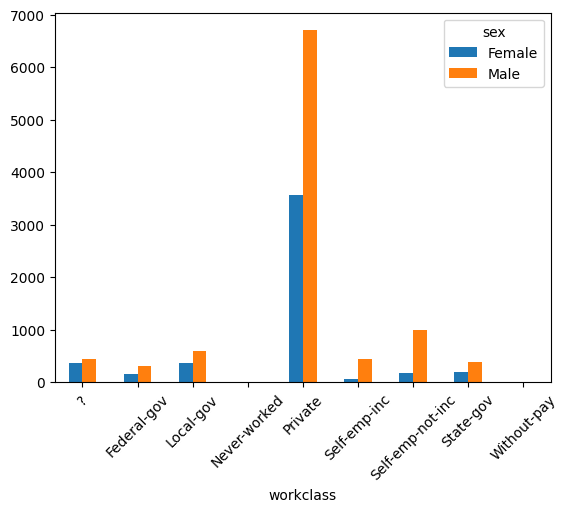

In [108]:
wc_sex_crosstab = pd.crosstab(df.workclass, df.sex)

wc_sex_bar = wc_sex_crosstab.plot.bar(rot=45)

Contingency table of sex and marriage.

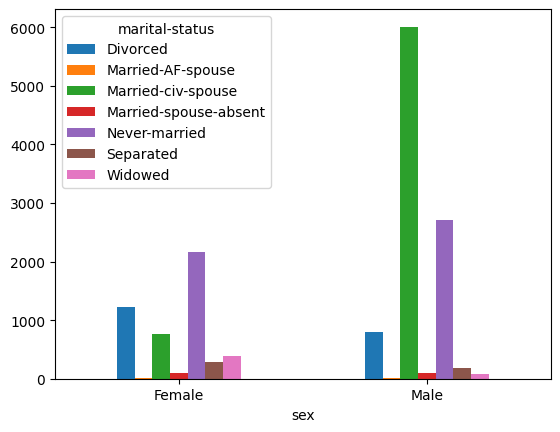

In [109]:
sex_marriage_crosstab = pd.crosstab(df.sex, df['marital-status'])

sex_marriage_bar = sex_marriage_crosstab.plot.bar(rot=0)

New dataframe that only includes rows where the age value is over 40.

In [110]:
adultOver40 = df[df.age > 40]
adultOver40

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
7,43,Private,7,Married-civ-spouse,Transport-moving,Male,0,2042,<=50K
8,54,?,10,Married-civ-spouse,?,Male,0,0,>50K
...,...,...,...,...,...,...,...,...,...
14787,45,Local-gov,12,Divorced,Prof-specialty,Female,0,0,<=50K
14790,65,Self-emp-not-inc,15,Never-married,Prof-specialty,Male,1086,0,<=50K
14791,43,State-gov,10,Divorced,Adm-clerical,Female,0,0,<=50K
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K


Same contingency table as before (sex and marriage) with the new dataframe.

The most striking difference between the two is the much smaller "not married" category for the >40 group, along with the >40 group's massive "married to civilian spouse" category in men.

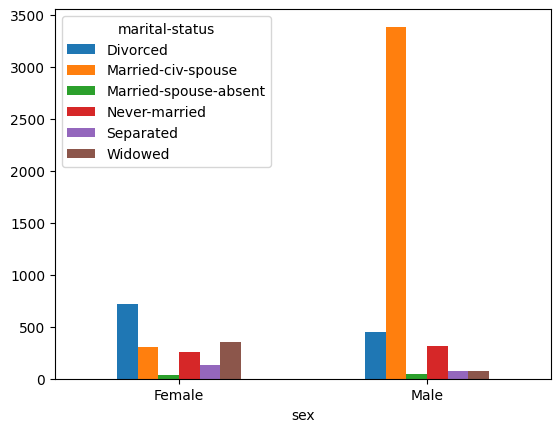

In [111]:
sm_over_40_crosstab = pd.crosstab(adultOver40.sex, adultOver40['marital-status'])

sm_over_40_bar = sm_over_40_crosstab.plot.bar(rot=0)

Checks for rows with education values outside of 3 standard deviations. The dataframe comes out empty, so there are no outliers in this category.

In [112]:
edu_zscore = stats.zscore(df.education)

outliers = df[abs(edu_zscore > 3)] # finds education values outside 3 standard deviations

outliers


,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income


Standardizes the age category, gets the z-score, and uses it to find any rows with an age value outside of 3 standard deviations. There are 60 outliers in the age category.

In [113]:
age_mean = df.age.mean()
age_std = df.age.std()

standardized_age = (df.age - age_mean) - age_std

age_zscore = stats.zscore(standardized_age)

outliers = df[abs(age_zscore > 3)]
outliers.sort_values(by='age', ascending=False)

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
99,90,Private,9,Never-married,Other-service,Male,0,2206,<=50K
4114,90,?,9,Widowed,?,Female,0,4356,<=50K
8921,90,Private,9,Married-civ-spouse,Machine-op-inspct,Male,0,0,<=50K
8785,90,Private,10,Divorced,Sales,Female,0,0,<=50K
8608,90,Private,14,Never-married,Exec-managerial,Female,0,0,<=50K
11091,90,?,2,Widowed,?,Female,0,0,<=50K
8405,90,Private,13,Never-married,Prof-specialty,Female,0,0,<=50K
11562,90,?,4,Separated,?,Female,0,0,<=50K
7254,90,Private,13,Married-civ-spouse,Exec-managerial,Female,0,0,>50K
6476,90,Local-gov,12,Married-civ-spouse,Adm-clerical,Male,0,0,<=50K


Creates a histogram of all rows with an age value of 80 or above. There is a strange anomaly in the data where there are over 20 rows with an age of 90, breaking the trend of decreasing frequencies as age goes up.

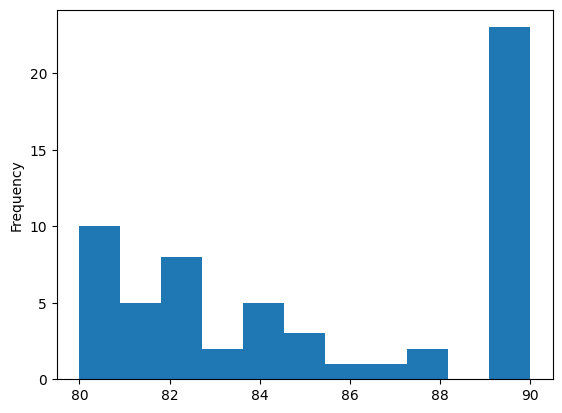

In [114]:
over_80_df = df[df.age >= 80].age

over_80_hist = over_80_df.plot.hist(bins=11)

Here are my main takeaways after analyzing this dataset:
- the majority of men and women work in the private sector as opposed to in local, state, or national governments.
- Women are for less likely to be married than men, but are more likely to be divorced.
- This dataset has a suspiciously high number of 90-year-olds. Perhaps each age above 90 was rounded down when the data was collected?

## **Problem 2**

Here are our tasks for problem 2:

- ✓ Sort the data set by saturated_fat and produce a listing of the five food items highest in saturated fat. Comment on the validity of comparing food items of different sizes.
- ✓ Create a new variable, saturated_fat_per_gram, by dividing the amount of saturated fat  by the weight in grams. Sort the data set by saturated_fat_per_gram and produce a listing of the five food  items highest in saturated fat per gram. Which food has the most saturated fat per gram?
- ✓ Standardize (zero mean) the field saturated_fat_per_gram, and produce a listing of all the food items that are outliers at the high end of the scale. How many food items are outliers at the low end of the scale? Create a density plot for saturated_fat_per_gram
- ✓ Are there any missing values? If so, impute as necessary and explain your approach.
Standardize (zero mean) the numeric variables, and determine if there are any outliers.
Summarize your findings.

In [115]:
df = pd.read_csv('nutrition_subset.csv')
df

,food item,weight_in_grams,saturated_fat,cholesterol
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79
...,...,...,...,...
956,COFFEE; BREWED 6 FL OZ,180.00,0.0,0
957,TEA; BREWED 8 FL OZ,240.00,0.0,0
958,TEA; INSTANT;PREPRD;UNSWEETEND8 FL OZ,241.00,0.0,0
959,LETTUCE; BUTTERHEAD; RAW;LEAVE1 LEAF,15.00,0.0,0


The five items with the most saturated fat. Comparing items of different sizes is difficult because, as obvious as it sounds, they have differing amounts of food. This means that direct comparison of nutrition doesn't really give you any meaningful insight.

In [116]:
satfat_df = df.sort_values('saturated_fat', ascending=False)
satfat_df.head(5)

,food item,weight_in_grams,saturated_fat,cholesterol
378,CHEESECAKE 1 CAKE,1110.0,119.9,2053
535,ICE CREAM; VANLLA; RICH 16% FT1/2 GAL,1188.0,118.3,703
458,YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,1108.0,92.0,609
581,CREME PIE 1 PIE,910.0,90.1,46
890,LARD 1 CUP,205.0,80.4,195


Adds saturated_fat_per_gram to the dataframe. The food with the most saturated fat per gram is butter.

In [117]:
df['saturated_fat_per_gram'] = df['saturated_fat'] / df['weight_in_grams']

satfat_per_gram_df = df.sort_values(by='saturated_fat_per_gram', ascending=False)
satfat_per_gram_df.head(5)

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
908,BUTTER; SALTED 1 TBSP,14.0,7.1,31,0.507143
909,BUTTER; UNSALTED 1 TBSP,14.0,7.1,31,0.507143
710,BUTTER; UNSALTED 1/2 CUP,113.0,57.1,247,0.505310
709,BUTTER; SALTED 1/2 CUP,113.0,57.1,247,0.505310
913,BUTTER; UNSALTED 1 PAT,5.0,2.5,11,0.500000


Standardizes saturated_fat_per_gram and shows the high-end outliers (3 standard deviations).

In [118]:
satfat_per_gram_mean = df['saturated_fat_per_gram'].mean()
satfat_per_gram_std = df['saturated_fat_per_gram'].std()

standardized_satfat_per_gram = (df['saturated_fat_per_gram'] - satfat_per_gram_mean) - satfat_per_gram_std

satfat_per_gram_zscore = stats.zscore(standardized_satfat_per_gram)

outliers = df[abs(satfat_per_gram_zscore > 3)] # gets values outside 3 standard deviations
outliers.sort_values(by='saturated_fat_per_gram', ascending=False)

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
908,BUTTER; SALTED 1 TBSP,14.00,7.1,31,0.507143
909,BUTTER; UNSALTED 1 TBSP,14.00,7.1,31,0.507143
709,BUTTER; SALTED 1/2 CUP,113.00,57.1,247,0.505310
710,BUTTER; UNSALTED 1/2 CUP,113.00,57.1,247,0.505310
912,BUTTER; SALTED 1 PAT,5.00,2.5,11,0.500000
913,BUTTER; UNSALTED 1 PAT,5.00,2.5,11,0.500000
899,LARD 1 TBSP,13.00,5.1,12,0.392308
890,LARD 1 CUP,205.00,80.4,195,0.392195
920,IMITATION CREAMERS; POWDERED 1 TSP,2.00,0.7,0,0.350000
210,CHOCOLATE; BITTER OT BAKING 1 OZ,28.35,9.0,0,0.317460


Shows low-end outliers (3 standard deviations).

In [119]:
outliers.sort_values(by='saturated_fat_per_gram', ascending=True)

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
907,FATS; COOKING/VEGETBL SHORTENG1 CUP,205.00,51.3,0,0.250244
898,FATS; COOKING/VEGETBL SHORTENG1 TBSP,13.00,3.3,0,0.253846
448,COCONUT; RAW; SHREDDED 1 CUP,80.00,23.8,0,0.297500
576,COCONUT; RAW; PIECE 1 PIECE,45.00,13.4,0,0.297778
492,COCONUT; DRIED; SWEETND;SHREDD1 CUP,93.00,29.3,0,0.315054
210,CHOCOLATE; BITTER OT BAKING 1 OZ,28.35,9.0,0,0.317460
920,IMITATION CREAMERS; POWDERED 1 TSP,2.00,0.7,0,0.350000
890,LARD 1 CUP,205.00,80.4,195,0.392195
899,LARD 1 TBSP,13.00,5.1,12,0.392308
912,BUTTER; SALTED 1 PAT,5.00,2.5,11,0.500000


Density plot of saturated_fat_per_gram.

<Axes: ylabel='Density'>

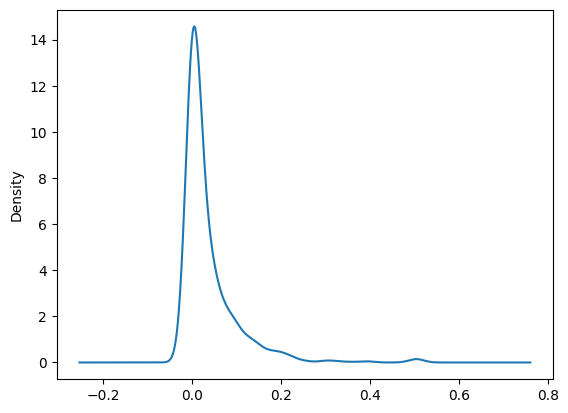

In [120]:
df['saturated_fat_per_gram'].plot.density()

There are no null values, and as far as I could tell just scrolling through the dataframe for a little while there weren't any other kinds of missing values either.

In [121]:
df.isnull().values.any()

False

Standardization and outlier check for weight_in_grams.

In [122]:
weight_in_grams_mean = df['weight_in_grams'].mean()
weight_in_grams_std = df['weight_in_grams'].std()

standardized_weight_in_grams = (df['weight_in_grams'] - weight_in_grams_mean) - weight_in_grams_std

weight_in_grams_zscore = stats.zscore(standardized_weight_in_grams)

outliers = df[abs(weight_in_grams_zscore > 3)] # gets values outside 3 standard deviations
outliers.sort_values(by='weight_in_grams', ascending=False)

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
696,SHERBET; 2% FAT 1/2 GAL,1542.0,19.0,113,0.012322
422,CARROT CAKE;CREMCHESE FRST;REC1 CAKE,1536.0,66.0,1183,0.042969
376,FRUITCAKE;DARK; FROM HOMERECIP1 CAKE,1361.0,47.6,640,0.034974
535,ICE CREAM; VANLLA; RICH 16% FT1/2 GAL,1188.0,118.3,703,0.099579
445,WHITE CAKE W/ WHT FRSTNG;COMML1 CAKE,1140.0,33.1,46,0.029035
378,CHEESECAKE 1 CAKE,1110.0,119.9,2053,0.108018
458,YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,1108.0,92.0,609,0.083032
423,YELLOW CAKE W/ CHOC FRST;FRMIX1 CAKE,1108.0,47.8,576,0.043141
410,DEVIL'S FOOD CAKE;CHOCFRST;FMX1 CAKE,1107.0,55.6,598,0.050226
479,SHEETCAKE;W/ WHFRSTNG;HOMERCIP1 CAKE,1096.0,41.6,636,0.037956


Standardization and outlier check for saturated_fat.

In [123]:
saturated_fat_mean = df['saturated_fat'].mean()
saturated_fat_std = df['saturated_fat'].std()

standardized_saturated_fat = (df['saturated_fat'] - saturated_fat_mean) - saturated_fat_std

saturated_fat_zscore = stats.zscore(standardized_saturated_fat)

outliers = df[abs(saturated_fat_zscore > 3)] # gets values outside 3 standard deviations
outliers.sort_values(by='saturated_fat', ascending=False)

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
378,CHEESECAKE 1 CAKE,1110.0,119.9,2053,0.108018
535,ICE CREAM; VANLLA; RICH 16% FT1/2 GAL,1188.0,118.3,703,0.099579
458,YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,1108.0,92.0,609,0.083032
581,CREME PIE 1 PIE,910.0,90.1,46,0.099011
890,LARD 1 CUP,205.0,80.4,195,0.392195
466,ICE CREAM; VANLLA; REGULR 11% 1/2 GALN,1064.0,71.3,476,0.067011
422,CARROT CAKE;CREMCHESE FRST;REC1 CAKE,1536.0,66.0,1183,0.042969
710,BUTTER; UNSALTED 1/2 CUP,113.0,57.1,247,0.505310
709,BUTTER; SALTED 1/2 CUP,113.0,57.1,247,0.505310
410,DEVIL'S FOOD CAKE;CHOCFRST;FMX1 CAKE,1107.0,55.6,598,0.050226


Standardization and outlier check for cholesterol.

In [124]:
cholesterol_mean = df['cholesterol'].mean()
cholesterol_std = df['cholesterol'].std()

standardized_cholesterol = (df['cholesterol'] - cholesterol_mean) - cholesterol_std

cholesterol_zscore = stats.zscore(standardized_cholesterol)

outliers = df[abs(cholesterol_zscore > 3)] # gets values outside 3 standard deviations
outliers.sort_values(by='cholesterol', ascending=False)

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
378,CHEESECAKE 1 CAKE,1110.0,119.9,2053,0.108018
422,CARROT CAKE;CREMCHESE FRST;REC1 CAKE,1536.0,66.0,1183,0.042969
384,POUND CAKE; COMMERCIAL 1 LOAF,500.0,52.0,1100,0.104000
361,CUSTARD PIE 1 PIE,910.0,33.7,1010,0.037033
452,LEMON MERINGUE PIE 1 PIE,840.0,26.0,857,0.030952
535,ICE CREAM; VANLLA; RICH 16% FT1/2 GAL,1188.0,118.3,703,0.099579
430,PUMPKIN PIE 1 PIE,910.0,38.2,655,0.041978
376,FRUITCAKE;DARK; FROM HOMERECIP1 CAKE,1361.0,47.6,640,0.034974
479,SHEETCAKE;W/ WHFRSTNG;HOMERCIP1 CAKE,1096.0,41.6,636,0.037956
458,YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,1108.0,92.0,609,0.083032


Here are my findings from problem 2:

- nutritional information is far more useful when measured on a per-weight basis (i.e. saturated fat per gram)
- coconut has a surprising amount of saturated fat in it.
- cake, ice cream, and butter are terrible for you.
- cheesecake is *especially* terrible for you.